In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('adult.csv')
df.shape

(32561, 15)

In [4]:
df.loc[0:20]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


## try to find if there is a relation between missing values in native.country and other features (no relation)

In [5]:
df_specific = df[df['native.country'] == '?']
df_specific = pd.DataFrame(df_specific)
print(df_specific)

       age         workclass  fnlwgt     education  education.num  \
9       41           Private   70037  Some-college             10   
18      22           Private  119592    Assoc-acdm             12   
65      60      Self-emp-inc  226355     Assoc-voc             11   
86      39  Self-emp-not-inc  218490   Prof-school             15   
87      43       Federal-gov  156996   Prof-school             15   
...    ...               ...     ...           ...            ...   
32459   44      Self-emp-inc   71556       Masters             14   
32476   58      Self-emp-inc  181974     Doctorate             16   
32498   42  Self-emp-not-inc  217597       HS-grad              9   
32515   39           Private  107302       HS-grad              9   
32528   81                 ?  120478     Assoc-voc             11   

           marital.status         occupation   relationship  \
9           Never-married       Craft-repair      Unmarried   
18          Never-married  Handlers-cleaners 

## drop missing values in native.country since they are not important

In [6]:
df = df[df['native.country'] != '?']

In [7]:
k = 0
for i in df['native.country']:
    if i == '?':
        k = k + 1
print(k)

0


## Have noticed a correlation between missing values in workclass and occupation

In [8]:
k = 0
for i in df['workclass']:
    if i == '?':
        k = k+1
print(k)
k = 0
for i in df['occupation']:
    if i == '?':
        k = k+1
print(k)

1809
1816


In [9]:
k = 0
for i in range(len(df)):
    if df.iloc[i,1]==df.iloc[i,6]=='?':
        k = k + 1
print(k)

1809


In [10]:
k = 0
for i in range(len(df)):
    if df.iloc[i,1]==df.iloc[i,14]=='?':
        k = k + 1
print(k)

0


## substitute missing values

In [11]:
df['workclass'] = df['workclass'].str.replace('?','unemployed')
df['occupation'] = df['occupation'].str.replace('?','no_occupation')

df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unemployed,77053,HS-grad,9,Widowed,no_occupation,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unemployed,186061,Some-college,10,Widowed,no_occupation,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [12]:
df = df.dropna()
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,unemployed,77053,HS-grad,9,Widowed,no_occupation,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,unemployed,186061,Some-college,10,Widowed,no_occupation,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [13]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
unemployed           1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [14]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [15]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [16]:
df['income'] = df['income'].map({'<=50K' : 0, '>50K' : 1})
df['sex'] = df['sex'].map({'Female' : 0, 'Male' : 1})
print(df)

       age   workclass  fnlwgt     education  education.num  \
0       90  unemployed   77053       HS-grad              9   
1       82     Private  132870       HS-grad              9   
2       66  unemployed  186061  Some-college             10   
3       54     Private  140359       7th-8th              4   
4       41     Private  264663  Some-college             10   
...    ...         ...     ...           ...            ...   
32556   22     Private  310152  Some-college             10   
32557   27     Private  257302    Assoc-acdm             12   
32558   40     Private  154374       HS-grad              9   
32559   58     Private  151910       HS-grad              9   
32560   22     Private  201490       HS-grad              9   

           marital.status         occupation   relationship   race  sex  \
0                 Widowed      no_occupation  Not-in-family  White    0   
1                 Widowed    Exec-managerial  Not-in-family  White    0   
2                 

In [17]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
unemployed           1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [18]:
df['race'].value_counts()

White                 27430
Black                  3028
Asian-Pac-Islander      956
Amer-Indian-Eskimo      311
Other                   253
Name: race, dtype: int64

In [19]:
df['relationship'].value_counts()

Husband           12947
Not-in-family      8156
Own-child          5005
Unmarried          3384
Wife               1534
Other-relative      952
Name: relationship, dtype: int64

In [20]:
df['marital.status'].value_counts()

Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [21]:
df = pd.get_dummies(df, columns=['workclass'],drop_first=True)
df = pd.get_dummies(df, columns=['marital.status'],drop_first=True)
df = pd.get_dummies(df, columns=['race'],drop_first=True)
df = pd.get_dummies(df, columns=['relationship'],drop_first=True)
print(df)

       age  fnlwgt     education  education.num         occupation  sex  \
0       90   77053       HS-grad              9      no_occupation    0   
1       82  132870       HS-grad              9    Exec-managerial    0   
2       66  186061  Some-college             10      no_occupation    0   
3       54  140359       7th-8th              4  Machine-op-inspct    0   
4       41  264663  Some-college             10     Prof-specialty    0   
...    ...     ...           ...            ...                ...  ...   
32556   22  310152  Some-college             10    Protective-serv    1   
32557   27  257302    Assoc-acdm             12       Tech-support    0   
32558   40  154374       HS-grad              9  Machine-op-inspct    1   
32559   58  151910       HS-grad              9       Adm-clerical    0   
32560   22  201490       HS-grad              9       Adm-clerical    1   

       capital.gain  capital.loss  hours.per.week native.country  ...  \
0                 0       

In [22]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['native.country','occupation','education'], return_df = True)
df = encoder.fit_transform(df)


In [23]:
df

,age,fnlwgt,education_0,education_1,education_2,education_3,education_4,education.num,occupation_0,occupation_1,...,marital.status_Widowed,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,90,77053,0,0,0,0,1,9,0,0,...,1,0,0,0,1,1,0,0,0,0
1,82,132870,0,0,0,0,1,9,0,0,...,1,0,0,0,1,1,0,0,0,0
2,66,186061,0,0,0,1,0,10,0,0,...,1,0,1,0,0,0,0,0,1,0
3,54,140359,0,0,0,1,1,4,0,0,...,0,0,0,0,1,0,0,0,1,0
4,41,264663,0,0,0,1,0,10,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,0,0,0,1,0,10,1,1,...,0,0,0,0,1,1,0,0,0,0
32557,27,257302,0,1,1,0,1,12,1,0,...,0,0,0,0,1,0,0,0,0,1
32558,40,154374,0,0,0,0,1,9,0,0,...,0,0,0,0,1,0,0,0,0,0
32559,58,151910,0,0,0,0,1,9,0,1,...,1,0,0,0,1,0,0,0,1,0


<Axes: ylabel='income'>

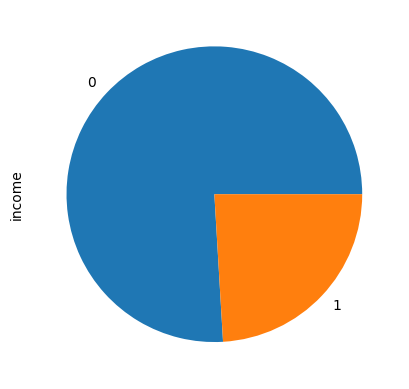

In [24]:
beta = df['income']
beta.value_counts().plot.pie()

In [25]:
# from crucio import SMOTEENN
# smoteenn = SMOTEENN()
# balanced_df = smoteenn.balance(df, 'income')
# balanced_df

In [26]:
from kydavra import PValueSelector
pvalue_selector = PValueSelector()
selected_columns = pvalue_selector.select(df, 'income')

In [27]:
selected_columns

['age',
 'fnlwgt',
 'education_0',
 'education_1',
 'education_2',
 'education_4',
 'education.num',
 'occupation_0',
 'occupation_1',
 'occupation_2',
 'occupation_3',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country_1',
 'native.country_3',
 'native.country_4',
 'native.country_5',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'workclass_unemployed',
 'marital.status_Never-married',
 'race_Black',
 'race_Other',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
 'relationship_Wife']

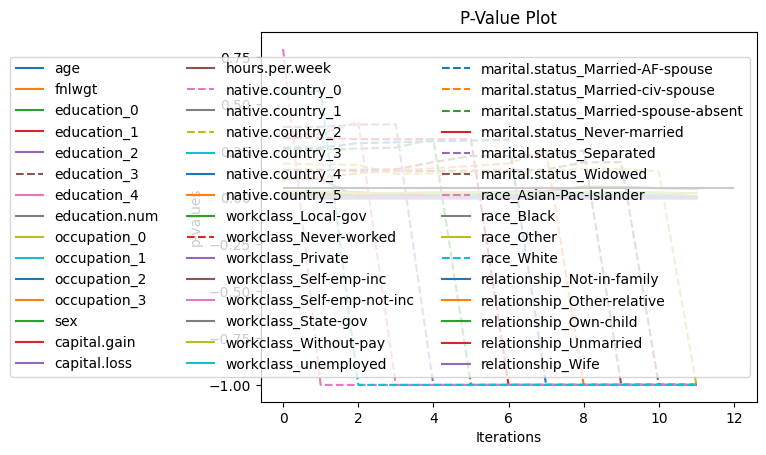

In [28]:
pvalue_selector.plot_process()

In [29]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df.drop('income', axis =1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_sm = sm.add_constant(X_train)
X_train_sm
view = sm.OLS(y_train,X_train_sm).fit()
print(view.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     264.4
Date:                Thu, 29 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:44:34   Log-Likelihood:                -7426.7
No. Observations:               21425   AIC:                         1.495e+04
Df Residuals:                   21379   BIC:                         1.531e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [30]:
from kydavra import JensenShannonSelector

jensen = JensenShannonSelector()
cols = jensen.select(df, 'income')
print(f'\nselected columns: {cols}')
print(len(cols))



selected columns: ['age', 'fnlwgt', 'education_2', 'education_3', 'education_4', 'education.num', 'occupation_1', 'occupation_2', 'sex', 'capital.gain', 'hours.per.week', 'native.country_5', 'workclass_Private', 'marital.status_Married-civ-spouse', 'race_White']
15


In [31]:
print(df)

       age  fnlwgt  education_0  education_1  education_2  education_3  \
0       90   77053            0            0            0            0   
1       82  132870            0            0            0            0   
2       66  186061            0            0            0            1   
3       54  140359            0            0            0            1   
4       41  264663            0            0            0            1   
...    ...     ...          ...          ...          ...          ...   
32556   22  310152            0            0            0            1   
32557   27  257302            0            1            1            0   
32558   40  154374            0            0            0            0   
32559   58  151910            0            0            0            0   
32560   22  201490            0            0            0            0   

       education_4  education.num  occupation_0  occupation_1  ...  \
0                1              9        

### we can drop relatioship, race and marital.status and native.country

In [32]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
X = df.drop('income', axis=1)
Y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 12, test_size=0.25)
sm = SMOTENC(random_state=42, categorical_features=[44])
X_res, y_ress = sm.fit_resample(X_train,y_train)


<Axes: ylabel='income'>

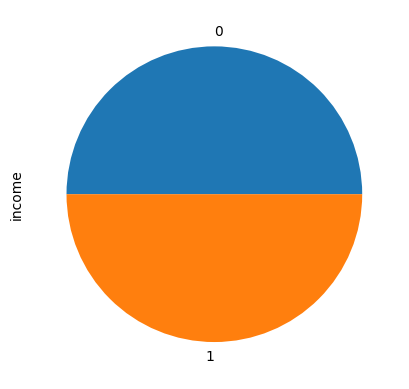

In [33]:
y_ress.value_counts().plot.pie()

In [34]:
print(X_res)


       age  fnlwgt  education_0  education_1  education_2  education_3  \
0       24  258298            0            1            0            1   
1       45  285335            0            0            0            1   
2       52   23780            0            0            0            1   
3       53   98791            0            0            0            1   
4       28  199566            0            0            1            1   
...    ...     ...          ...          ...          ...          ...   
36313   43  235592            0            0            0            0   
36314   36  198838            0            0            0            0   
36315   43  144418            0            0            0            0   
36316   41   76285            0            1            0            0   
36317   39  129223            0            0            0            0   

       education_4  education.num  occupation_0  occupation_1  ...  \
0                0             11        

In [35]:
print(y_ress)

0        0
1        0
2        0
3        0
4        0
        ..
36313    1
36314    1
36315    1
36316    1
36317    1
Name: income, Length: 36318, dtype: int64


In [36]:
df_balanced = pd.concat([X_res, y_ress], axis = 1)
df_balanced

,age,fnlwgt,education_0,education_1,education_2,education_3,education_4,education.num,occupation_0,occupation_1,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,income
0,24,258298,0,1,0,1,0,11,1,0,...,0,0,0,1,1,0,0,0,0,0
1,45,285335,0,0,0,1,1,4,1,0,...,0,0,0,1,0,0,0,0,0,0
2,52,23780,0,0,0,1,0,10,0,1,...,0,0,0,1,1,0,0,0,0,0
3,53,98791,0,0,0,1,0,10,1,0,...,0,0,0,1,0,0,0,0,0,0
4,28,199566,0,0,1,1,1,13,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36313,43,235592,0,0,0,0,1,12,0,0,...,0,0,0,1,0,0,0,0,0,1
36314,36,198838,0,0,0,0,0,13,0,0,...,0,0,0,1,0,0,0,0,0,1
36315,43,144418,0,0,0,0,1,10,0,1,...,0,0,0,1,0,0,0,0,0,1
36316,41,76285,0,1,0,0,0,11,0,0,...,0,0,0,1,0,0,0,0,0,1


<Axes: ylabel='income'>

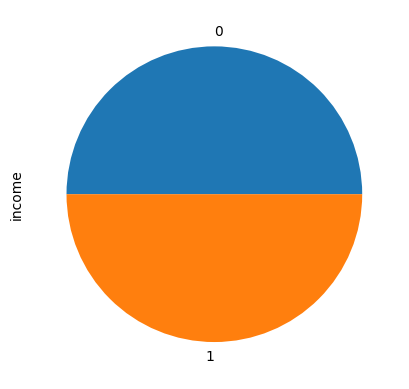

In [37]:
df_balanced['income'].value_counts().plot.pie()

<Axes: ylabel='Frequency'>

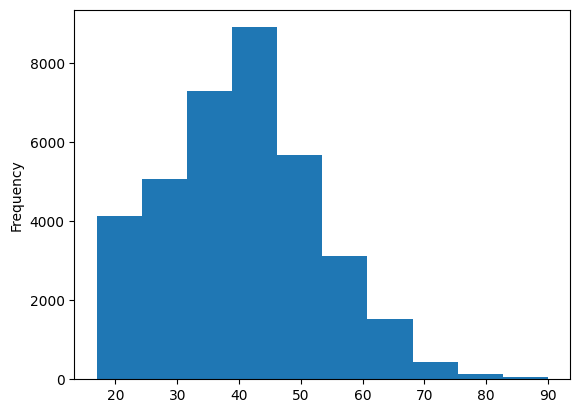

In [38]:
df_balanced['age'].plot.hist()

<Axes: ylabel='Frequency'>

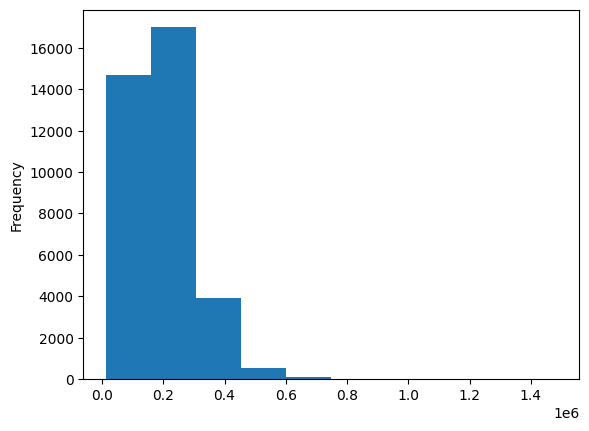

In [39]:
df_balanced['fnlwgt'].plot.hist()


## At the begining lets work with the unbalanced dataset.

## Logistic Regression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'penalty': ['l1', 'l2', 'elasticnet'],
'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
clf = GridSearchCV(LogisticRegression(), tuned_parameters,scoring='recall')
clf.fit(X_train, y_train)
prediction1 = clf.predict(X_test)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test,prediction1))


Best parameters set found on development set:
{'penalty': 'l2', 'solver': 'newton-cholesky'}
0.8540337711069418


In [55]:
f1 = accuracy_score(y_test,prediction1)

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'criterion': ['gini', 'entropy', 'log_loss'],
'max_features': ['log2', 'sqrt',None],
'class_weight' :['balanced', 'balanced_subsample']
}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train, y_train)
prediction2 = clf.predict(X_test)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test,prediction2))


Best parameters set found on development set:
{'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'log2'}
0.858411507191995


In [56]:
f2 = accuracy_score(y_test,prediction2)

## TreeDecissionClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['best','random'],
'max_features': ['log2', 'sqrt',int,float,'auto']
}
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train, y_train)
prediction3 = clf.predict(X_test)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test,prediction3))


Best parameters set found on development set:
{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}
0.8107567229518449


In [58]:
f3 = accuracy_score(y_test,prediction3)

 ## KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'weights': ['uniform', 'distance'],
'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train, y_train)
prediction4 = clf.predict(X_test)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test,prediction4))


Best parameters set found on development set:
{'algorithm': 'auto', 'weights': 'distance'}
0.7698561601000625


In [57]:
f4 = accuracy_score(y_test,prediction4)

## SVC

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
clf = SVC()
clf.fit(X_train, y_train)
prediction5 = clf.predict(X_test)
print(accuracy_score(y_test,prediction5))


0.8008755472170106


In [59]:
f5 = accuracy_score(y_test,prediction5)

## Now lets work with the balanced dataset.

In [45]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop('income', axis = 1)
Y = df_balanced['income']

X_train_balanced,X_test_balanced,y_train_balanced,y_test_balanced = train_test_split(X,Y, test_size=0.25, random_state=12)
X_train_balanced

,age,fnlwgt,education_0,education_1,education_2,education_3,education_4,education.num,occupation_0,occupation_1,...,marital.status_Widowed,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
14410,54,244770,0,0,0,0,1,9,0,1,...,0,0,0,0,1,0,1,0,0,0
9503,56,159770,0,0,0,0,1,9,1,0,...,0,0,0,0,1,0,0,0,0,0
19654,18,101061,0,1,0,0,1,7,1,0,...,0,0,0,0,1,0,0,1,0,0
26468,43,265189,0,0,1,1,0,13,0,0,...,0,0,0,0,1,0,0,0,0,0
30179,45,104458,0,0,0,0,0,13,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,28,216965,0,0,0,1,0,10,1,1,...,0,0,0,0,1,0,0,0,0,0
12108,49,147322,0,1,0,1,0,11,0,0,...,0,0,0,0,1,0,0,0,0,1
9475,34,212064,0,0,0,0,1,9,0,1,...,0,0,0,0,1,0,0,0,1,0
19709,19,188008,0,0,0,1,0,10,1,0,...,0,0,1,0,0,0,0,1,0,0


## Logistic Regression

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'penalty': ['l1', 'l2', 'elasticnet'],
'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
clf = GridSearchCV(LogisticRegression(), tuned_parameters,scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)
prediction11 = clf.predict(X_test_balanced)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test_balanced,prediction11))


Best parameters set found on development set:
{'penalty': 'l2', 'solver': 'newton-cg'}
0.8851321585903084


In [64]:
f6 = accuracy_score(y_test_balanced,prediction11)

## Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'criterion': ['gini', 'entropy', 'log_loss'],
'max_features': ['log2', 'sqrt',None],
'class_weight' :['balanced', 'balanced_subsample']
}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)
prediction22 = clf.predict(X_test_balanced)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test_balanced,prediction22))

Best parameters set found on development set:
{'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.9005506607929515


In [65]:
f7 = accuracy_score(y_test_balanced,prediction22)

## TreeDecissionClassifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['best','random'],
'max_features': ['log2', 'sqrt',int,float,'auto']
}
clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)
prediction33 = clf.predict(X_test_balanced)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test_balanced,prediction33))


Best parameters set found on development set:
{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
0.8580396475770925


In [66]:
f8 = accuracy_score(y_test_balanced,prediction33)

 ## KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'weights': ['uniform', 'distance'],
'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)
prediction44 = clf.predict(X_test_balanced)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test_balanced,prediction44))


Best parameters set found on development set:
{'algorithm': 'auto', 'weights': 'distance'}
0.7357929515418502


In [69]:
f9 = accuracy_score(y_test_balanced,prediction44)

## SVC

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

clf = SVC()
clf.fit(X_train_balanced, y_train_balanced)
prediction55 = clf.predict(X_test_balanced)
print(accuracy_score(y_test_balanced,prediction55))


0.5920704845814978


In [67]:
f10 = accuracy_score(y_test_balanced,prediction55)

In [74]:
unbalanced = [f1,f2,f3,f4,f5]
balanced = [f6,f7,f8,f9,f10]
index = ['Logisitc Regression', 'Random Forest Classifier','TreeDecissionClassifier','KNeighborsClassifier','SVC']
dic = {
    'index' : index,
    'Unbalanced' : unbalanced,
    'Balanced' : balanced
}
show1 = pd.DataFrame(dic)
show1.set_index('index',inplace = True)
show1

,Unbalanced,Balanced
index,,
Logisitc Regression,0.854034,0.885132
Random Forest Classifier,0.858412,0.900551
TreeDecissionClassifier,0.810757,0.858040
KNeighborsClassifier,0.769856,0.735793
SVC,0.800876,0.592070


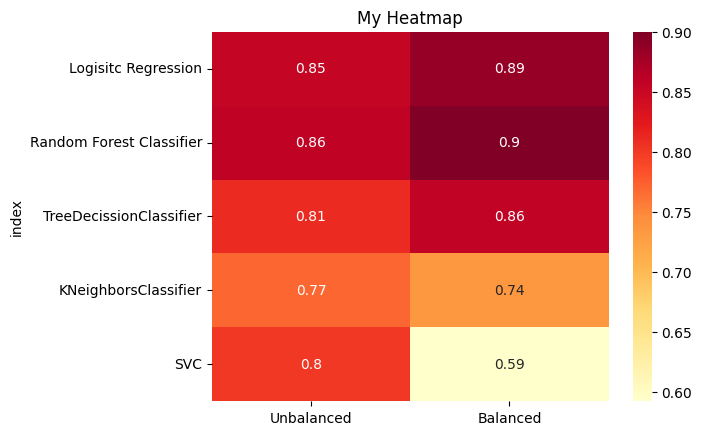

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# create a heatmap using seaborn
sns.heatmap(show1, cmap='YlOrRd', annot=True)

# set the plot title
plt.title('My Heatmap')

# show the plot
plt.show()

## Lets try to drop some columns( relationship, race and marital.status and native.country)

In [98]:
df = pd.read_csv('adult.csv')
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [99]:
df = df.drop(['relationship','race','marital.status','native.country'],axis = 1)

In [100]:
df['workclass'] = df['workclass'].str.replace('?','unemployed')
df['occupation'] = df['occupation'].str.replace('?','no_occupation')


In [101]:
df['income'] = df['income'].map({'<=50K' : 0, '>50K' : 1})
df['sex'] = df['sex'].map({'Female' : 0, 'Male' : 1})
print(df)

       age   workclass  fnlwgt     education  education.num  \
0       90  unemployed   77053       HS-grad              9   
1       82     Private  132870       HS-grad              9   
2       66  unemployed  186061  Some-college             10   
3       54     Private  140359       7th-8th              4   
4       41     Private  264663  Some-college             10   
...    ...         ...     ...           ...            ...   
32556   22     Private  310152  Some-college             10   
32557   27     Private  257302    Assoc-acdm             12   
32558   40     Private  154374       HS-grad              9   
32559   58     Private  151910       HS-grad              9   
32560   22     Private  201490       HS-grad              9   

              occupation  sex  capital.gain  capital.loss  hours.per.week  \
0          no_occupation    0             0          4356              40   
1        Exec-managerial    0             0          4356              18   
2          n

In [102]:
df = pd.get_dummies(df, columns=['workclass'],drop_first=True)
print(df)

       age  fnlwgt     education  education.num         occupation  sex  \
0       90   77053       HS-grad              9      no_occupation    0   
1       82  132870       HS-grad              9    Exec-managerial    0   
2       66  186061  Some-college             10      no_occupation    0   
3       54  140359       7th-8th              4  Machine-op-inspct    0   
4       41  264663  Some-college             10     Prof-specialty    0   
...    ...     ...           ...            ...                ...  ...   
32556   22  310152  Some-college             10    Protective-serv    1   
32557   27  257302    Assoc-acdm             12       Tech-support    0   
32558   40  154374       HS-grad              9  Machine-op-inspct    1   
32559   58  151910       HS-grad              9       Adm-clerical    0   
32560   22  201490       HS-grad              9       Adm-clerical    1   

       capital.gain  capital.loss  hours.per.week  income  \
0                 0          4356     

In [103]:
import category_encoders as ce
df
encoder = ce.BinaryEncoder(cols=['occupation','education'], return_df = True)
df = encoder.fit_transform(df)
df

,age,fnlwgt,education_0,education_1,education_2,education_3,education_4,education.num,occupation_0,occupation_1,...,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unemployed
0,90,77053,0,0,0,0,1,9,0,0,...,40,0,0,0,0,0,0,0,0,1
1,82,132870,0,0,0,0,1,9,0,0,...,18,0,0,0,1,0,0,0,0,0
2,66,186061,0,0,0,1,0,10,0,0,...,40,0,0,0,0,0,0,0,0,1
3,54,140359,0,0,0,1,1,4,0,0,...,40,0,0,0,1,0,0,0,0,0
4,41,264663,0,0,0,1,0,10,0,1,...,40,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,0,0,0,1,0,10,1,1,...,40,0,0,0,1,0,0,0,0,0
32557,27,257302,0,1,0,1,0,12,1,1,...,38,0,0,0,1,0,0,0,0,0
32558,40,154374,0,0,0,0,1,9,0,0,...,40,1,0,0,1,0,0,0,0,0
32559,58,151910,0,0,0,0,1,9,0,1,...,40,0,0,0,1,0,0,0,0,0


<Axes: ylabel='income'>

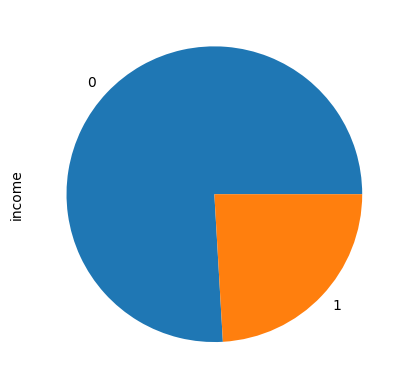

In [104]:
beta = df['income']
beta.value_counts().plot.pie()

<Axes: ylabel='income'>

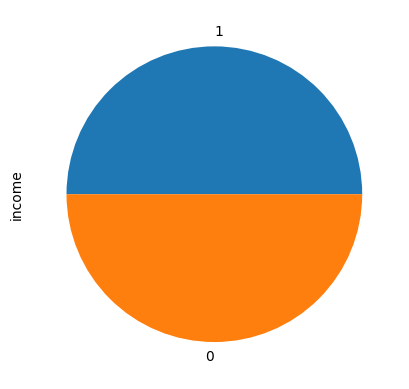

In [108]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
X = df.drop('income', axis=1)
Y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 12, test_size=0.25)
sm = SMOTENC(random_state=42, categorical_features=[23])
X_res, y_ress = sm.fit_resample(X_train,y_train)
y_ress.value_counts().plot.pie()

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

tuned_parameters = {
'criterion': ['gini', 'entropy', 'log_loss'],
'max_features': ['log2', 'sqrt',None],
'class_weight' :['balanced', 'balanced_subsample']
}
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters,scoring='recall')
clf.fit(X_train_balanced, y_train_balanced)
prediction22 = clf.predict(X_test_balanced)
print("Best parameters set found on development set:")
print(clf.best_params_)
print(accuracy_score(y_test_balanced,prediction22))

Best parameters set found on development set:
{'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'}
0.901431718061674


In [112]:
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters = 3, n_init="auto",random_state=420).fit(df)
# cluster2 = kmeans.predict(df)
# centroids  = kmeans.cluster_centers_ 
# centroids

# dff = pd.DataFrame(data=centroids, columns = df.columns)
# dff

,age,fnlwgt,education_0,education_1,education_2,education_3,education_4,education.num,occupation_0,occupation_1,...,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,workclass_unemployed
0,38.371131,204998.051297,0.001758,0.208953,0.264143,0.523388,0.628430,10.060275,0.287750,0.523137,...,40.328687,0.240661,0.06693,3.767188e-04,0.714636,0.032209,0.071325,0.035035,0.000440,0.054624
1,39.663258,93231.952087,0.001014,0.205003,0.265844,0.538111,0.621852,10.174920,0.281477,0.520788,...,40.649485,0.243705,0.06194,-4.228388e-18,0.669934,0.040392,0.090840,0.045040,0.000423,0.057969
2,36.613542,377304.689167,0.002292,0.216875,0.285833,0.533333,0.614792,9.916042,0.298333,0.530000,...,40.275625,0.234167,0.06125,2.083333e-04,0.705417,0.026042,0.068750,0.043125,0.000417,0.058333
